# Research Understanding

### Understanding the problem of underfitting and overfiiting and solving it through predicting the final price of house in Ames, Iowa with 79 exploratory variables describing every aspect of residential homes.

# Data Understanding

In [1]:
#imported python packages
import numpy as np
import pandas as pd
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from xgboost import plot_importance
from sklearn.metrics import mean_absolute_error
import time
import pickle
import joblib
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

from sklearn.linear_model import ElasticNet, Lasso, ElasticNetCV
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.base import RegressorMixin
import lightgbm as lgb
import sklearn
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, Normalizer, StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin, clone

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score,train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression
from scipy.special import boxcox1p
import csv

In [2]:
# read the description file
f = open("data_description.txt", "r")
print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [3]:
# import sample_submission dataset
sample_submission = pd.read_csv('sample_submission.csv')

In [4]:
sample_submission.info()
sample_submission

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [5]:
# import training dataset
train = pd.read_csv('train.csv')

In [6]:
train.info()
train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [7]:
# import test dataset
test = pd.read_csv('test.csv')

In [8]:
test.info()
test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [9]:
# checking null values
print("No. of Null values in the train_df set :", train.isnull().sum().sum())
print("No. of Null values in the test set :", test.isnull().sum().sum())

No. of Null values in the train_df set : 6965
No. of Null values in the test set : 7000


In [10]:
# stats on SalePrice
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'Boxplot of SalePrice')

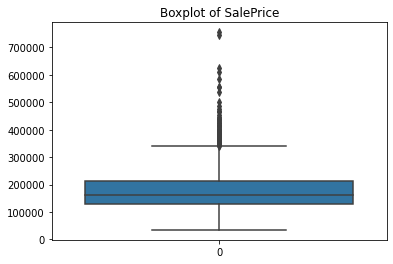

In [11]:
# boxplot for SalePrice
sns.boxplot(train['SalePrice'])
plt.title("Boxplot of SalePrice")

#### We can see skewed features in the plot.

/tmp/ipykernel_9447/335171907.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'])


Text(0.5, 1.0, 'Density plot of SalePrice')

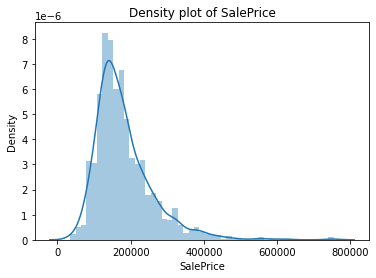

In [12]:
# The Density Plot of SalePrice
sns.distplot(train['SalePrice'])
plt.title("Density plot of SalePrice")

#### We can see skewed features in the plot.

In [13]:
# Positive Skeweness:
train['SalePrice'].skew()

1.8828757597682129

In [14]:
# log transformation of SalePrice because the density plot was skewed
train["SalePrice"] = np.log1p(train["SalePrice"])

/tmp/ipykernel_9447/2608140415.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["SalePrice"])


Text(0.5, 1.0, 'Density plot of SalePrice after Log Transformation')

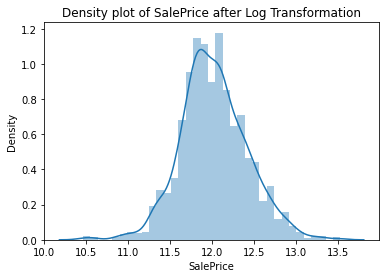

In [15]:
# density plot of SalePrice
sns.distplot(train["SalePrice"])
plt.title("Density plot of SalePrice after Log Transformation")

#### The plot is approximately normal now for SalePrice

In [16]:
# join train and test datset
train_df = pd.concat([train, test], ignore_index=True, sort=False)

# Because I merged train and test
train_df['SalePrice'].fillna(0, inplace=True)
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,0.000000
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,0.000000
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,0.000000
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,0.000000


# Data Cleaning and Preprocessing with Exploratory Data Analysis

In [17]:
# columns in train_df with null values
col_nan = train_df.isna().sum() / train_df.shape[0]

Text(0.5, 1.0, 'Features with the highest percentage of Nan values Train Data')

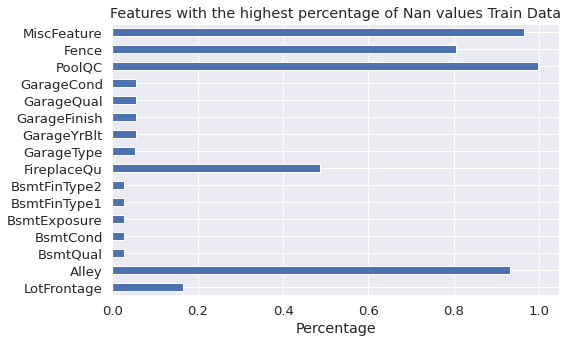

In [18]:
# plot columns in train_df with null values
plt.figure(figsize=(8, 5))
sns.set(font_scale=1.2)
col_nan[col_nan > 0.01].plot(kind = "barh")
plt.xlabel("Percentage")
plt.title("Features with the highest percentage of Nan values Train Data")

#### There are 4 features with more than 80% NAN values.

In [19]:
# drop features with more than 80% null values
train_df = train_df.drop("MiscFeature", axis=1)
train_df = train_df.drop("PoolQC", axis=1)
train_df = train_df.drop("Alley", axis=1)


In [20]:
train_df = train_df.drop("Fence", axis=1)

In [21]:
# Dropping columns for both train and test dataset
train_df = train_df.drop("Id", axis=1)

In [22]:
train_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2006,WD,Normal,0.000000
2915,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2006,WD,Abnorml,0.000000
2916,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2006,WD,Abnorml,0.000000
2917,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,700,7,2006,WD,Normal,0.000000


Text(0.5, 1.0, 'Histogram plot of Street')

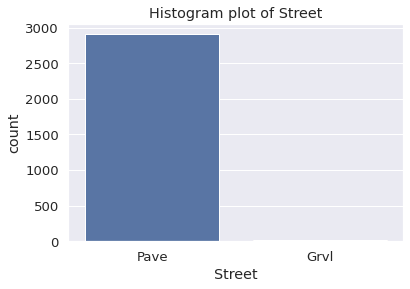

In [23]:
# histrogram plot for Street
sns.countplot(data=train_df, x="Street")
plt.title("Histogram plot of Street")

Text(0.5, 1.0, 'Histogram plot of Utilities')

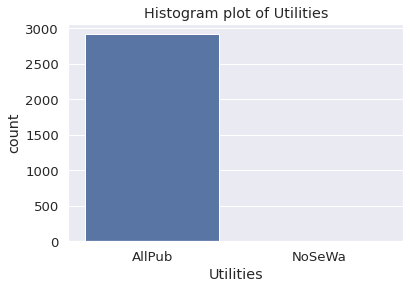

In [24]:
# histrogram plot for Utilities
sns.countplot(data=train_df, x="Utilities")
plt.title("Histogram plot of Utilities")

In [25]:
# drop Street and Utilities because they have same values
train_df = train_df.drop(["Street", "Utilities"], axis=1)

Text(0.5, 1.0, 'Boxplot of GrLivArea')

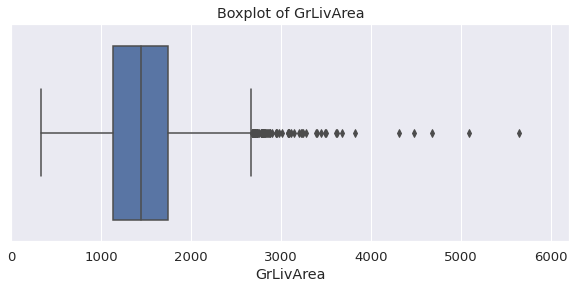

In [26]:
# Boxplot of GrLivArea
plt.figure(figsize=(10,4))
plt.xlim(0, train_df.GrLivArea.max()*1.1)
sns.boxplot(x=train_df.GrLivArea)
plt.title("Boxplot of GrLivArea")

In [27]:
# reomve outliers
train_df = train_df[train_df.GrLivArea<4000]


Text(0.5, 1.0, 'Boxplot of LotFrontage')

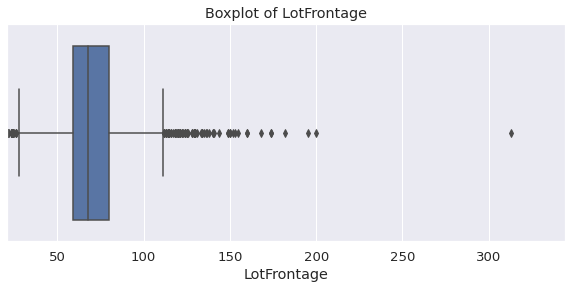

In [28]:
# boxplot of LotFrontage
plt.figure(figsize=(10,4))
plt.xlim(train_df.LotFrontage.min(), train_df.LotFrontage.max()*1.1)
sns.boxplot(x=train_df.LotFrontage)
plt.title("Boxplot of LotFrontage")

Text(0.5, 1.0, 'LotFrontage vs Saleprice')

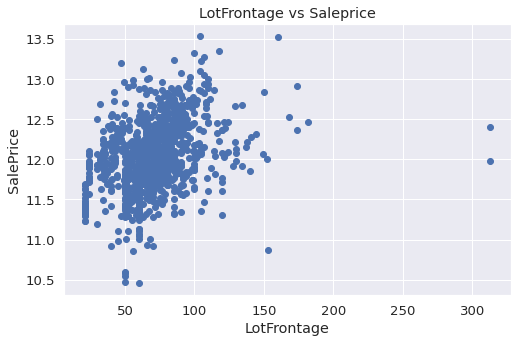

In [29]:
# scatter plot of LotFrontage vs SalePrice
plt.figure(figsize=(8, 5))
plt.scatter(train["LotFrontage"], train["SalePrice"])
plt.xlabel("LotFrontage")
plt.ylabel("SalePrice")
plt.title("LotFrontage vs Saleprice")

In [30]:
# reomve outliers
train_df = train_df[train_df.LotFrontage<250]

Text(0.5, 1.0, 'Boxplot of LotArea')

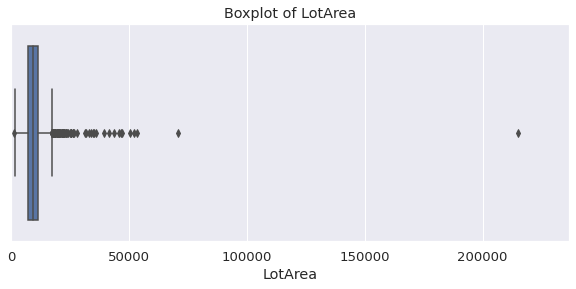

In [31]:
# Boxplot of LotArea
plt.figure(figsize=(10,4))
plt.xlim(-100, train_df.LotArea.max()*1.1)
sns.boxplot(x=train_df.LotArea)
plt.title("Boxplot of LotArea")

Text(0.5, 1.0, 'LotArea vs Saleprice')

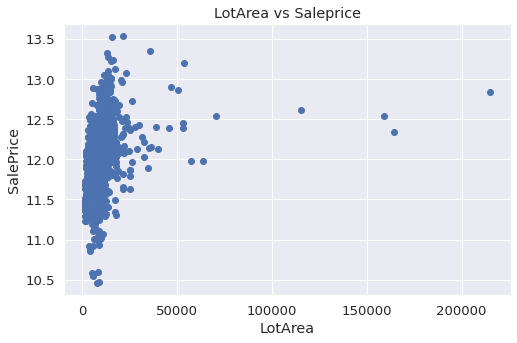

In [32]:
# scatter plot of LotArea vs SalePrice
plt.figure(figsize=(8, 5))
plt.scatter(train["LotArea"], train["SalePrice"])
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.title("LotArea vs Saleprice")

In [33]:
# remove outliers
train_df = train_df[train_df.LotArea<100000]

In [34]:
# 2017 is the final year in dataset
# YearBuilt greater than 2017
train_df[train_df.YearBuilt > 2017].count()[0] != 0

False

In [35]:
# GarageYrBlt greater than 2017
train_df[train_df.GarageYrBlt > 2017].count()[0] != 0

True

In [36]:
# locating data point with GarageYrBlt greater than 2017
train_df[train_df.GarageYrBlt > 2017].GarageYrBlt

2592    2207.0
Name: GarageYrBlt, dtype: float64

In [37]:
# assigning that data point with 2007 GarageYrBlt
train_df.loc[2592, 'GarageYrBlt'] = 2007

/tmp/ipykernel_9447/588060741.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['LotFrontage'])


Text(0.5, 1.0, 'Density plot of LotFrontage')

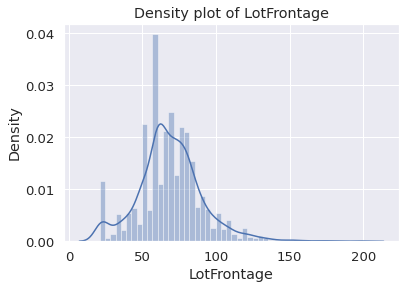

In [38]:
# density ploy of LotFrontage
sns.distplot(train_df['LotFrontage'])
plt.title("Density plot of LotFrontage")

#### The plot is approximately normal except LotFrontage between 50-60 having extreme values

Text(0.5, 1.0, 'Histogram plot of Neighborhood')

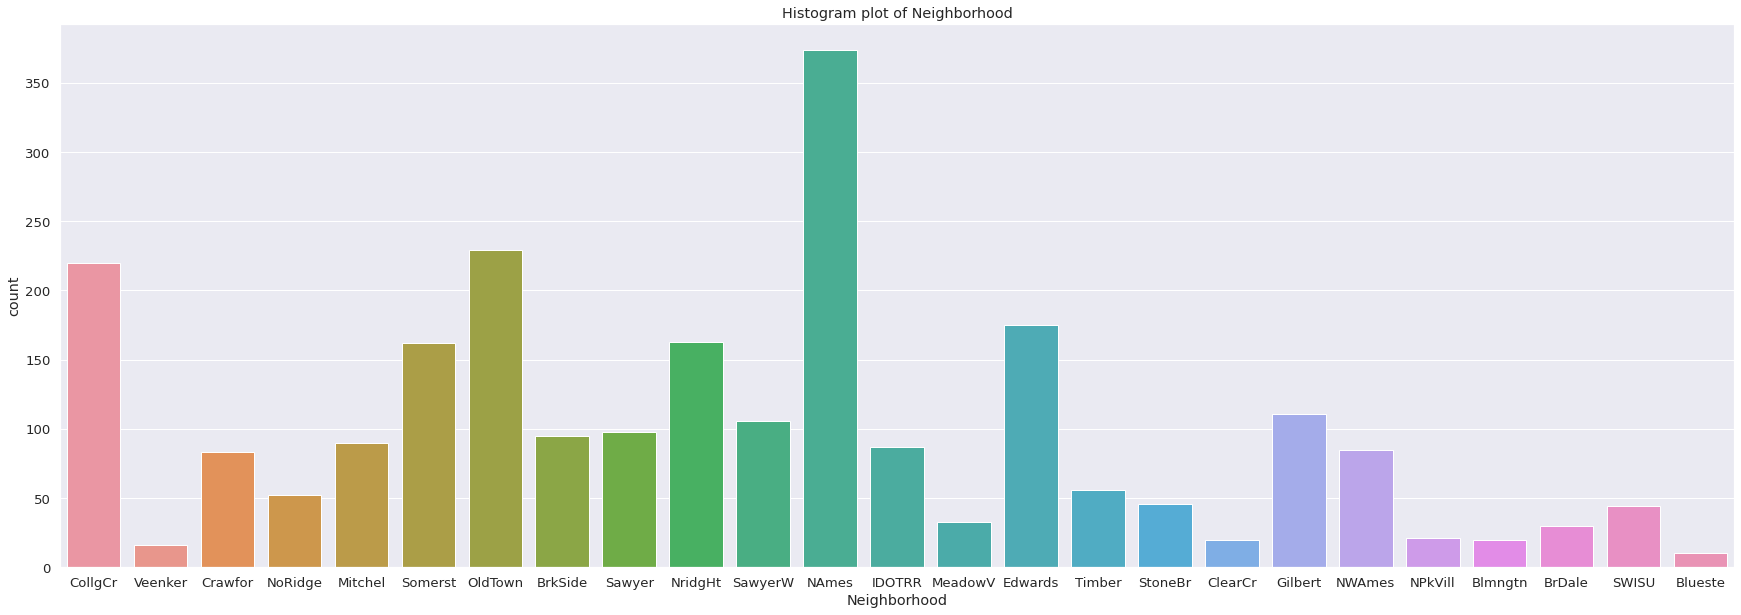

In [39]:
# histogram plot of Neighborhood
plt.figure(figsize=(30, 10))
sns.countplot(data=train_df,x='Neighborhood')
plt.title("Histogram plot of Neighborhood")

#### Neighborhoods like NAmes(highest sale), COllgCr, OldTown have high sales. And others like Veenker, ClearCr, MeadowV have low sales.

Text(0.5, 1.0, 'Median and Mean plot of LotFrontage per Neighborhood')

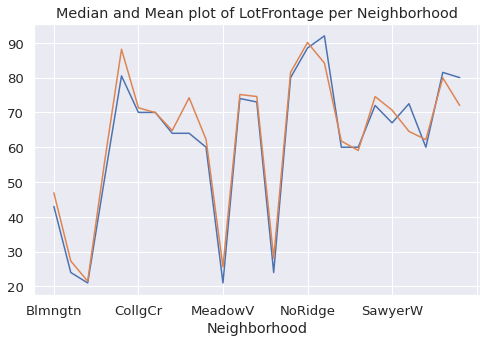

In [40]:
# Median and Mean plot of LotFrontage per Neightborhood
plt.figure(figsize=(8, 5))
train_df['LotFrontage'].groupby(train_df["Neighborhood"]).median().plot(y='Median', use_index=True)
train_df['LotFrontage'].groupby(train_df["Neighborhood"]).mean().plot(y='Mean', use_index=True)
plt.title("Median and Mean plot of LotFrontage per Neighborhood")

#### The median and mean plot are approximately the same but we will use median to avoid any skewness to fillnull values.

In [41]:
# fill the null values with median of LotFrontage per Neighborhood
train_df['LotFrontage'] = train_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

### The following graphs are studied to fill the null values with the most occuring numerical value.

/tmp/ipykernel_9447/1625594704.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df["BsmtFinSF1"])


Text(0.5, 1.0, 'Density plot of BsmtFinSF1')

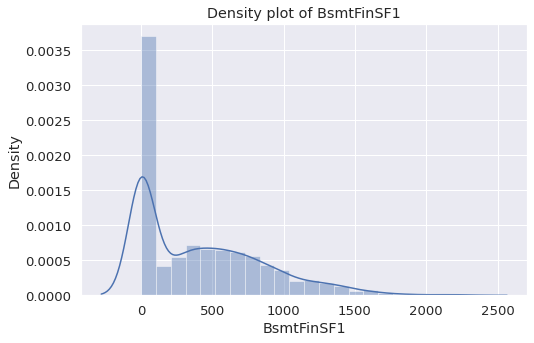

In [42]:
# density plot of BsmtFinSF1
plt.figure(figsize=(8, 5))
sns.distplot(train_df["BsmtFinSF1"])
plt.title("Density plot of BsmtFinSF1")

/tmp/ipykernel_9447/4238363079.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df["BsmtFinSF2"])


Text(0.5, 1.0, 'Density plot of BsmtFinSF2')

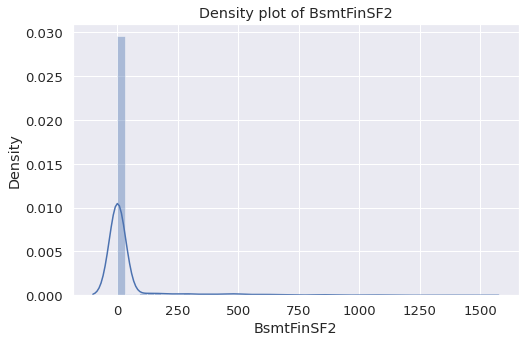

In [43]:
# Density plot of BsmtFinSF2
plt.figure(figsize=(8, 5))
sns.distplot(train_df["BsmtFinSF2"])
plt.title("Density plot of BsmtFinSF2")

Text(0.5, 1.0, 'Histogram plot of BsmtFullBath')

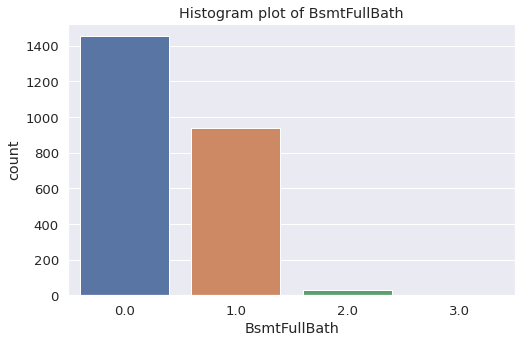

In [44]:
# Histogram plot of BsmtFullBath
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df,x="BsmtFullBath")
plt.title("Histogram plot of BsmtFullBath")

Text(0.5, 1.0, 'Histogram plot of BsmtHalfBath')

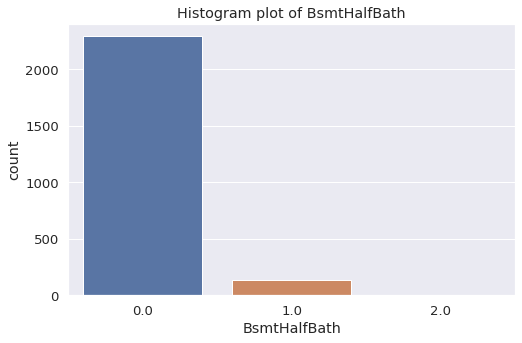

In [45]:
# Histogram plot of BsmtHalfBath
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df,x="BsmtHalfBath")
plt.title("Histogram plot of BsmtHalfBath")

/tmp/ipykernel_9447/1844980305.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df["MasVnrArea"])


Text(0.5, 1.0, 'Density plot of MasVnrArea')

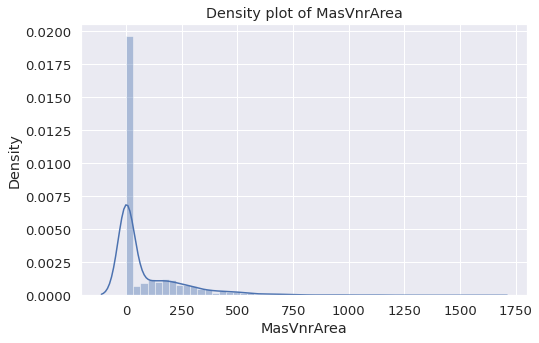

In [46]:
# Density plot of MasVnrArea
plt.figure(figsize=(8, 5))
sns.distplot(train_df["MasVnrArea"])
plt.title("Density plot of MasVnrArea")

In [47]:
# fill the null values
train_df['BsmtFinSF1'].fillna(0, inplace = True)
train_df['BsmtFinSF2'].fillna(0, inplace = True)
train_df['BsmtFullBath'].fillna(0, inplace = True)
train_df['BsmtHalfBath'].fillna(0, inplace = True)
train_df['MasVnrArea'].fillna(0, inplace = True)

In [48]:
# features with numerical values
num_features = train_df.select_dtypes(include=['int64','float64']).columns

In [49]:
num_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### The following plots show that the median of the features is optimal to fill the null values because of its skewness

/tmp/ipykernel_9447/2025492956.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df["BsmtUnfSF"])


Text(0.5, 1.0, 'Density plot of BsmtUnfSF')

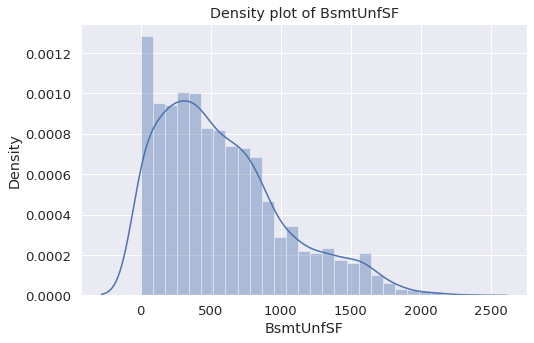

In [50]:
# Density plot of BsmtUnfSF
plt.figure(figsize=(8, 5))
sns.distplot(train_df["BsmtUnfSF"])
plt.title("Density plot of BsmtUnfSF")

In [51]:
# fill the null values
train_df['BsmtUnfSF'].fillna(train_df['BsmtUnfSF'].median(), inplace = True)

/tmp/ipykernel_9447/3352093118.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df["TotalBsmtSF"])


Text(0.5, 1.0, 'Density plot of TotalBsmtSF')

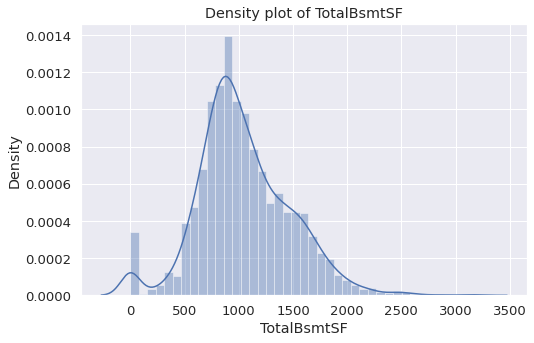

In [52]:
# Density plot of TotalBsmtSF
plt.figure(figsize=(8, 5))
sns.distplot(train_df["TotalBsmtSF"])
plt.title("Density plot of TotalBsmtSF")

In [53]:
# fill the null values
train_df['TotalBsmtSF'].fillna(train_df['TotalBsmtSF'].median(), inplace = True)

/tmp/ipykernel_9447/1396738506.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df["GarageYrBlt"])


Text(0.5, 1.0, 'Density plot of GarageYrBlt')

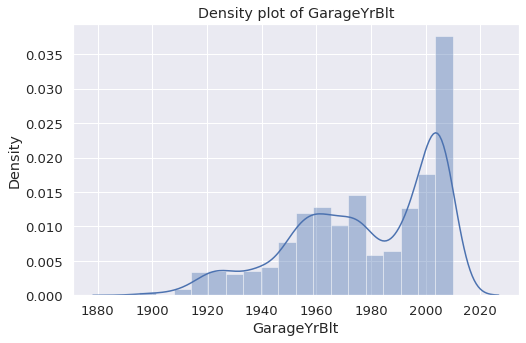

In [54]:
# Density plot of GarageYrBlt
plt.figure(figsize=(8, 5))
sns.distplot(train_df["GarageYrBlt"])
plt.title("Density plot of GarageYrBlt")

In [55]:
# fill the null values
train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].median(), inplace = True)

/tmp/ipykernel_9447/1401467949.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df["GarageCars"])


Text(0.5, 1.0, 'Density plot of GarageCars')

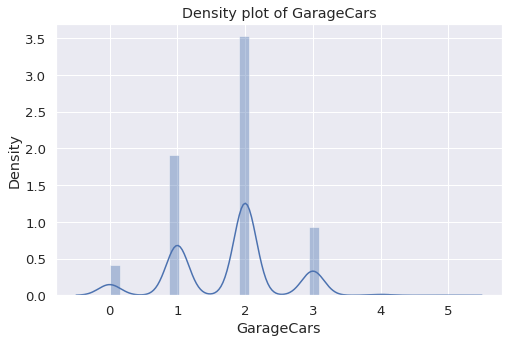

In [56]:
# Density plot of GarageCars
plt.figure(figsize=(8, 5))
sns.distplot(train_df["GarageCars"])
plt.title("Density plot of GarageCars")

In [57]:
# fill the null values
train_df['GarageCars'].fillna(train_df['GarageCars'].median(), inplace = True)

/tmp/ipykernel_9447/1485477088.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df["GarageArea"])


Text(0.5, 1.0, 'Density plot of GarageArea')

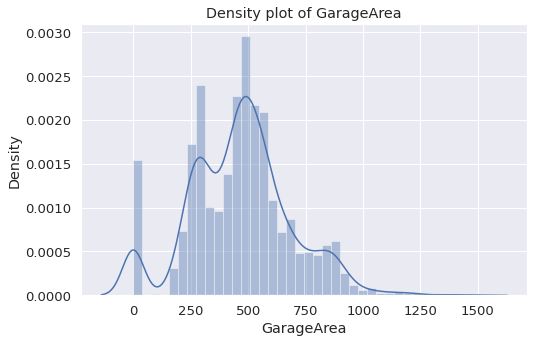

In [58]:
# Density plot of GarageArea
plt.figure(figsize=(8, 5))
sns.distplot(train_df["GarageArea"])
plt.title("Density plot of GarageArea")

In [59]:
# fill the null values 
train_df['GarageArea'].fillna(train_df['GarageArea'].median(), inplace = True)

### Following plots show which values for each feature should be used to fill the null values for categorical variables.

Text(0.5, 1.0, 'Histrogram plot of MasVnrType')

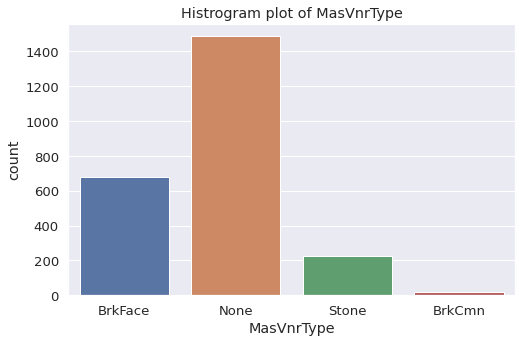

In [60]:
# Histrogram plot of MasVnrType
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df,x="MasVnrType")
plt.title("Histrogram plot of MasVnrType")

Text(0.5, 1.0, 'Histrogram plot of Electrical')

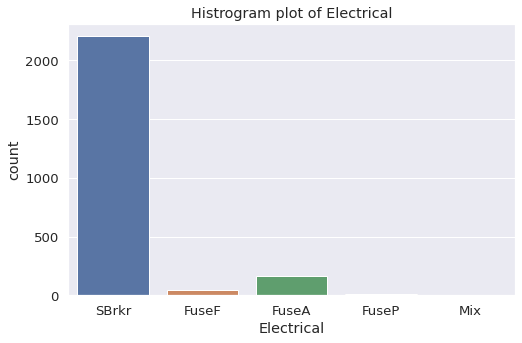

In [61]:
# Histrogram plot of Electrical
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df,x="Electrical")
plt.title("Histrogram plot of Electrical")

Text(0.5, 1.0, 'Histrogram plot of BsmtExposure')

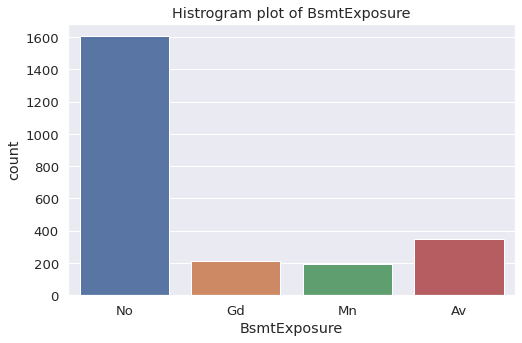

In [62]:
# Histrogram plot of BsmtExposure
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df,x="BsmtExposure")
plt.title("Histrogram plot of BsmtExposure")

Text(0.5, 1.0, 'Histrogram plot of HeaatingQC')

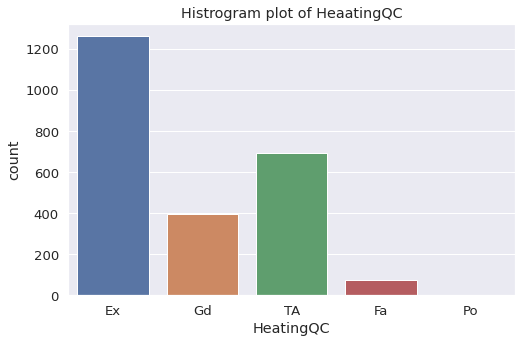

In [63]:
# Histrogram plot of HeaatingQC
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df,x="HeatingQC")
plt.title("Histrogram plot of HeaatingQC")

In [64]:
# conversion tuple list for categorical features
none_conversion = [("MasVnrType","None"),
                  ("BsmtQual","NA"), 
                  ("Electrical", "SBrkr"),
                  ("BsmtCond","TA"),
                  ("BsmtExposure","No"),
                  ("BsmtFinType1","No"),
                  ("BsmtFinType2","No"),
                  ("CentralAir","N"),
                  ("Condition1","Norm"), 
                  ("Condition2","Norm"),
                  ("ExterCond","TA"),
                  ("ExterQual","TA"), 
                  ("FireplaceQu","NA"),
                  ("Functional","Typ"),
                  ("GarageType","No"), 
                  ("GarageFinish","No"), 
                  ("GarageQual","NA"), 
                  ("GarageCond","NA"), 
                  ("HeatingQC","TA"), 
                  ("KitchenQual","TA"), 
                  ("Functional","Typ"), 
                  ("GarageType","No"), 
                  ("GarageFinish","No"), 
                  ("GarageQual","No"), 
                  ("GarageCond","No"), 
                  ("HeatingQC","TA"), 
                  ("KitchenQual","TA"),
                  ("MSZoning", "None"),
                  ("Exterior1st", "VinylSd"), 
                  ("Exterior2nd", "VinylSd"), 
                  ("SaleType", "WD")]

In [65]:
# function to convert null values to categorical values for categorical features and return dataframe
def none_transform(df, conversion_list):
    for col, new_str in conversion_list:
        df.loc[:, col] = df.loc[:, col].fillna(new_str)
    return df

In [66]:
# applying the none_transform function
train_df = none_transform(train_df, none_conversion)

In [67]:
# converting categorical feature to numerical feature
good_level_map = {
     'ExterQual': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1,'Po': 0},
     'ExterCond': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1,'Po': 0},
     'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1,'NA': 0},
     'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2,'Po': 1,'NA': 0},
     'BsmtCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2,'Po': 1,'NA': 0},
     'BsmtFinType1': {'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
     'BsmtFinType2': {'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
     'HeatingQC': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1,'Po': 0},
     'CentralAir': {'N':0, 'Y':1},
     'KitchenQual': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},
     'Functional': {'Typ':0,'Min1':1,'Min2':1,'Mod':2,'Maj1':3,'Maj2':4,'Sev':5,'Sal': 6},
     'FireplaceQu': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
     'GarageQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
     'GarageCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
    }

print(good_level_map.keys())
good_level_data = train_df[good_level_map.keys()].replace(good_level_map)

good_level_data.columns = good_level_data.columns.map(lambda m : m + '_')

train_df[good_level_data.columns] = good_level_data[good_level_data.columns]

dict_keys(['ExterQual', 'ExterCond', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageQual', 'GarageCond'])


In [68]:
# checking null values
train_df.isnull().sum().sum()

0

# Feature Engineering and Exploratory Data Analysis

In [69]:
# How many years has remodel from built
train_df['RemodYears'] = train_df['YearRemodAdd'] - train_df['YearBuilt']
# Did a remodeling happened from built?
train_df["HasRemodeled"] = (train_df["YearRemodAdd"] != train_df["YearBuilt"]) * 1
# Did a remodeling happen in the year the house was sold?
train_df["HasRecentRemodel"] = (train_df["YearRemodAdd"] == train_df["YrSold"]) * 1

In [70]:
# years required for building garage
train_df['GarageBltYears'] = train_df['GarageYrBlt'] - train_df['YearBuilt']

In [71]:
# How many years has build now?
train_df['Now_YearBuilt'] = 2017 - train_df['YearBuilt']
train_df['Now_YearRemodAdd'] = 2017 - train_df['YearRemodAdd']
train_df['Now_GarageYrBlt'] = 2017 - train_df['GarageYrBlt']

Text(0.5, 1.0, 'Mean plot for SalePrice per Month')

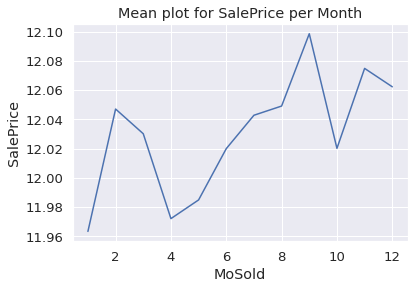

In [72]:
# Mean plot for SalePrice per Month
train['SalePrice'].groupby(train['MoSold']).mean().plot()
plt.xlabel("MoSold")
plt.ylabel("SalePrice")
plt.title("Mean plot for SalePrice per Month")

#### The sale price from the months 4-9 have increasing trend.

Text(0.5, 1.0, 'Histogram plot of MoSold')

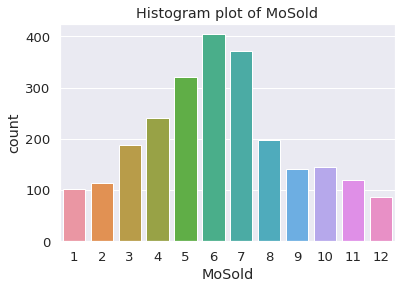

In [73]:
# Histogram plot of MoSold
sns.countplot(data=train_df,x='MoSold')
plt.title("Histogram plot of MoSold")

#### There were high sales during 5,6,7 months

In [74]:
# replacing MoSold with mean of the monthly SalePrice
sale_price_month = train['SalePrice'].groupby(train['MoSold']).mean().to_dict()
train_df["MonthSaledMeanPrice"] = train_df["MoSold"].replace(sale_price_month)

In [75]:
# number of sales per month
sale_month = {"1": 0, "2": 0, "3": 0, "4": 0, "5": 0, "6": 0, "7": 0, "8": 0, "9": 0, "10": 0, "11": 0, "12": 0}
for m in train_df['MoSold'].values:
    sale_month[str(m)] = sale_month[str(m)] + 1

In [76]:
sale_month

{'1': 102,
 '2': 113,
 '3': 187,
 '4': 240,
 '5': 320,
 '6': 404,
 '7': 371,
 '8': 197,
 '9': 142,
 '10': 144,
 '11': 119,
 '12': 87}

In [77]:
train_df['MoSold'] = train_df['MoSold'].map(lambda m : str(m))

In [78]:
# feature with number of sales per month
train_df["MonthSaledCount"] = train_df["MoSold"].replace(sale_month)

Text(0.5, 1.0, 'Mean plot of Saleprice per MSSubclass')

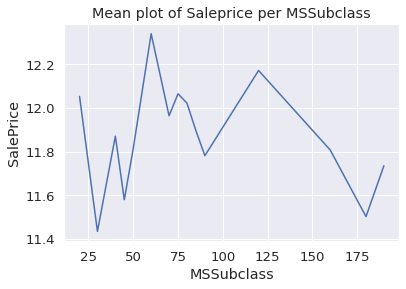

In [79]:
# Mean plot of Saleprice per MSSubclass
train['SalePrice'].groupby(train['MSSubClass']).mean().plot()
plt.xlabel("MSSubclass")
plt.ylabel("SalePrice")
plt.title("Mean plot of Saleprice per MSSubclass")

#### The plot shows a lot of fluctuations with highest sale price between 50-75 subclass.

Text(0.5, 1.0, 'Histogram plot of MSSubClass')

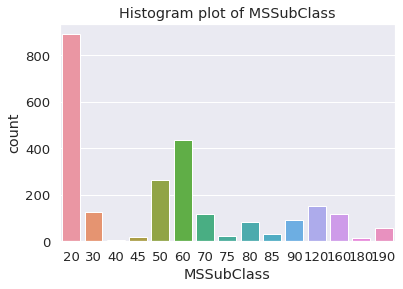

In [80]:
# Histogram plot of MSSubClass
sns.countplot(data=train_df,x='MSSubClass')
plt.title("Histogram plot of MSSubClass")

####  HIghest number of sales can be found in subclass 20.

In [81]:
# feature with mean price per MSSubClass
sale_price_mssc = train['SalePrice'].groupby(train['MSSubClass']).mean().to_dict()
train_df["MSSubClassMeanPrice"] = train_df["MSSubClass"].replace(sale_price_mssc)

### According to the following plots and summary the neighborhood has been given specific numerical value based on their price range.

Text(0.5, 1.0, 'Scatter plot of Neibhothood vs SalePrice')

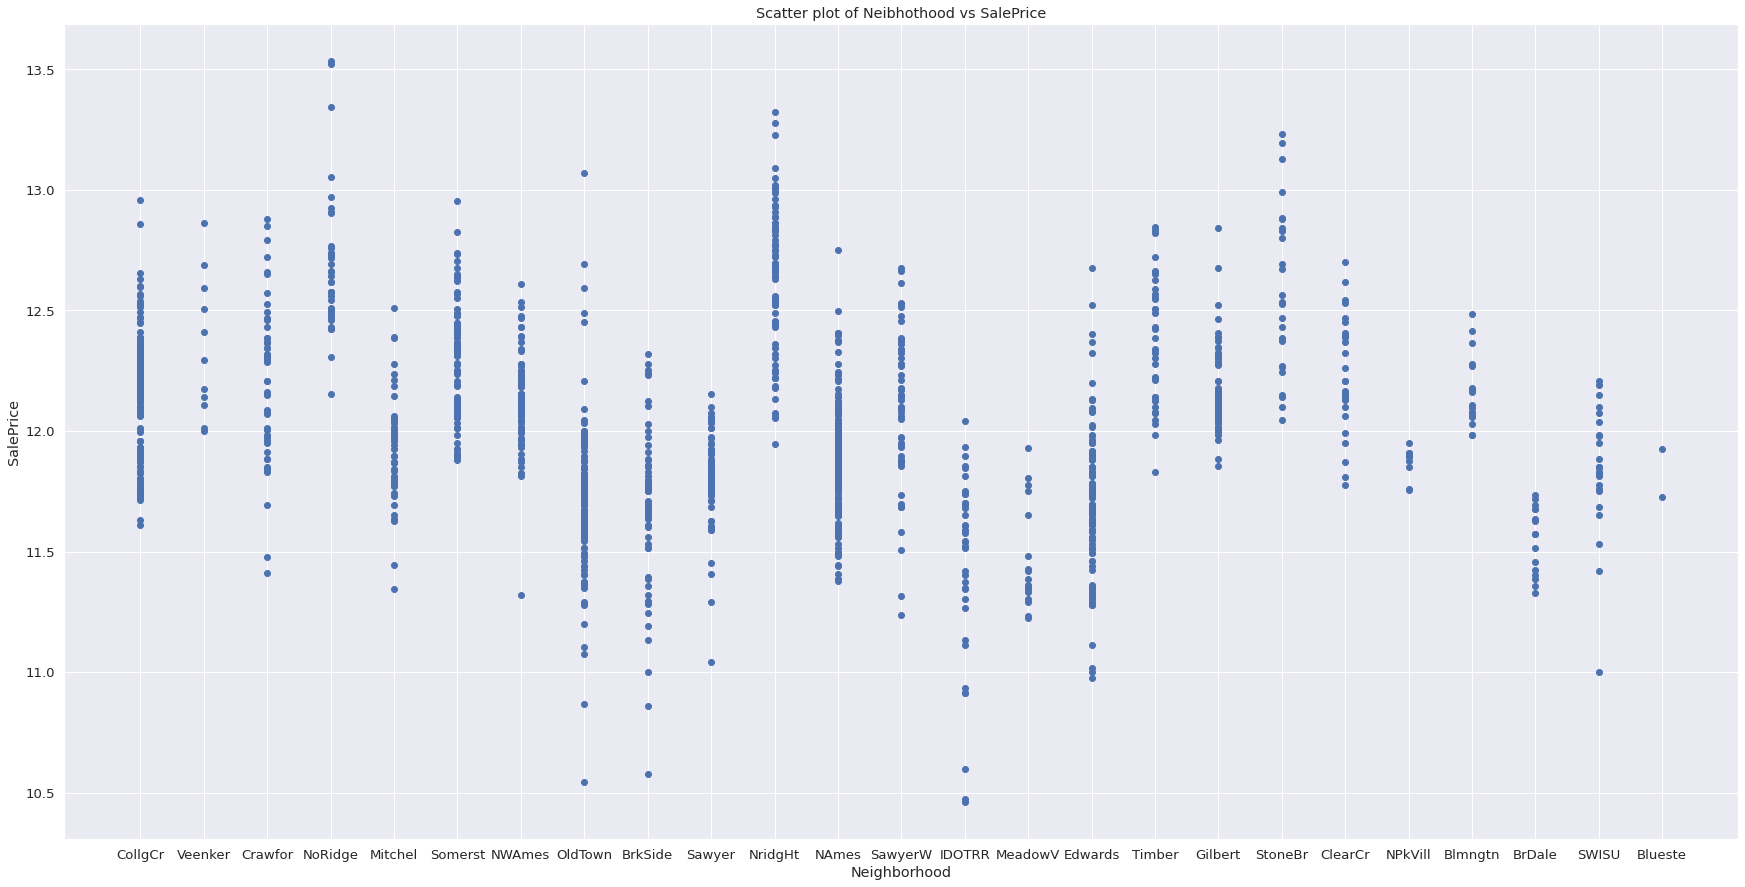

In [82]:
# scatter plot of Neibhothood vs SalePrice
plt.figure(figsize=(30, 15))
plt.scatter(train["Neighborhood"], train["SalePrice"])
plt.xlabel("Neighborhood")
plt.ylabel("SalePrice")
plt.title("Scatter plot of Neibhothood vs SalePrice")

Text(0.5, 1.0, 'Histogram plot of Neighborhood')

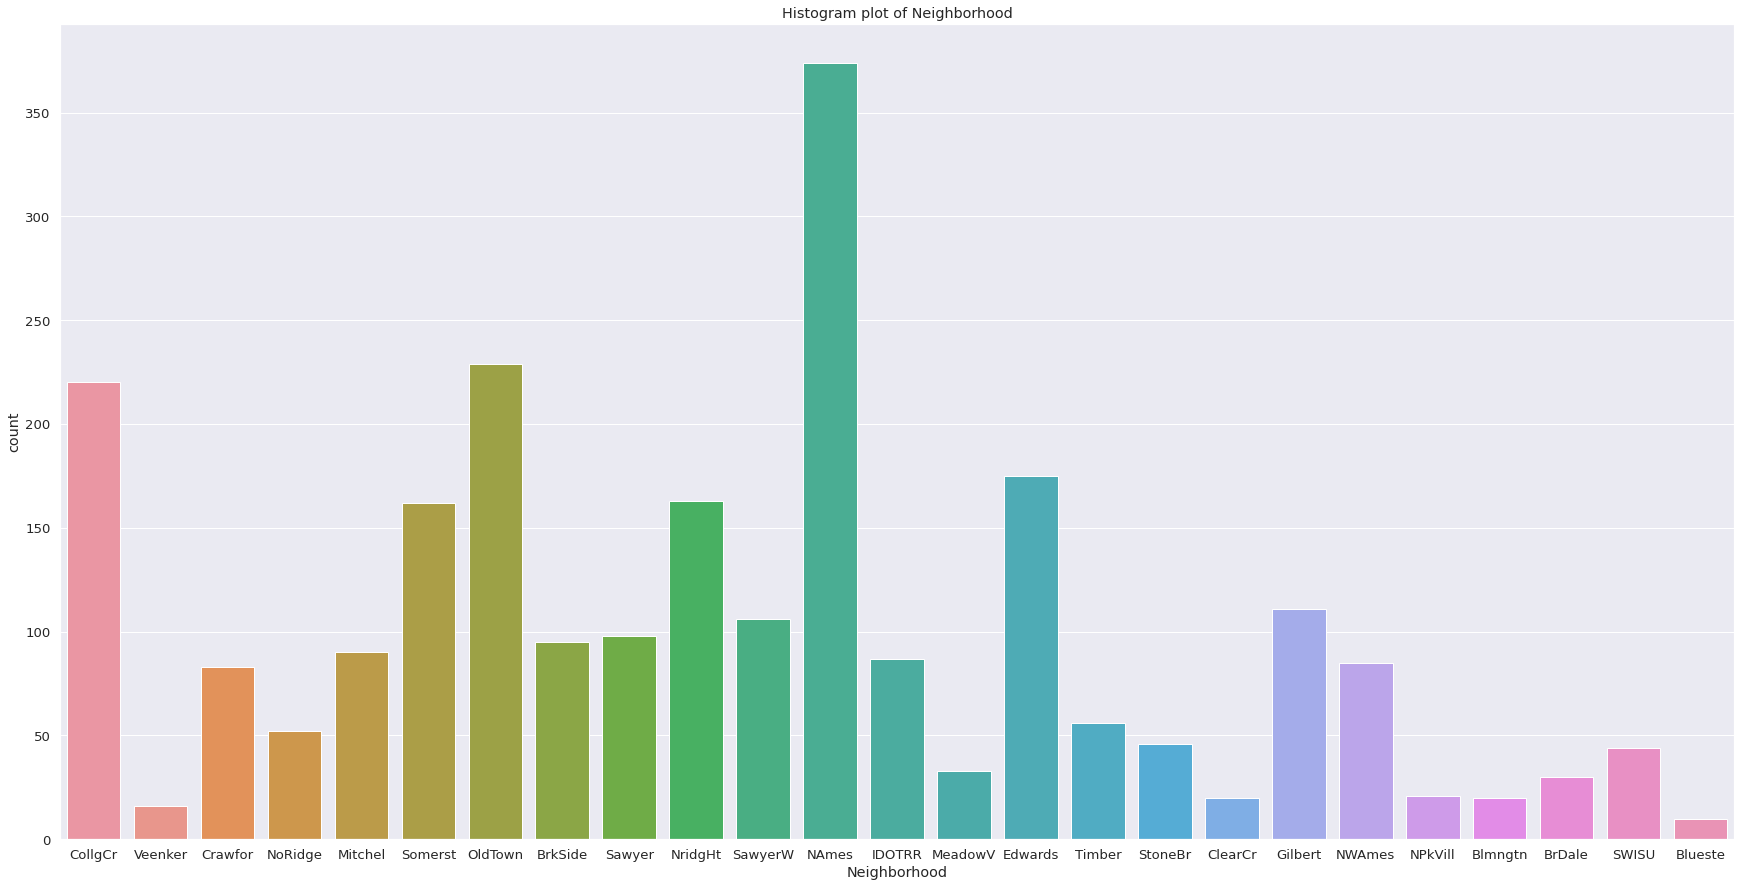

In [83]:
# Histogram plot of Neighborhood
plt.figure(figsize=(30, 15))
sns.countplot(data=train_df,x="Neighborhood")
plt.title("Histogram plot of Neighborhood")

In [84]:
# Dictionary of median SalePrice per NEighborhood
neighbor_price_map = train["SalePrice"].groupby(train["Neighborhood"]).median().sort_values().to_dict()

In [85]:
neighbor_price_map

{'MeadowV': 11.385103457032141,
 'IDOTRR': 11.542493975902508,
 'BrDale': 11.571203807011969,
 'OldTown': 11.686887175419702,
 'Edwards': 11.709629943623087,
 'BrkSide': 11.730225355795039,
 'Sawyer': 11.813037464800539,
 'Blueste': 11.826543323681236,
 'SWISU': 11.845827048676645,
 'NAmes': 11.849404844423074,
 'NPkVill': 11.891368749982085,
 'Mitchel': 11.941462360646149,
 'SawyerW': 12.100161978566867,
 'Gilbert': 12.10625783509458,
 'NWAmes': 12.116700301832573,
 'Blmngtn': 12.160033942617154,
 'CollgCr': 12.191972491986009,
 'ClearCr': 12.207326079382584,
 'Crawfor': 12.209192772866418,
 'Veenker': 12.292254928916668,
 'Somerst': 12.32607741432226,
 'Timber': 12.339184289866731,
 'StoneBr': 12.535379989788606,
 'NoRidge': 12.616528611893461,
 'NridgHt': 12.660331092405904}

In [86]:
# dictionary of categorical feature to numerical feature based on the neighbor_price_map 
neighbor_bin_map = {
    "MeadowV" : 0, 
    "IDOTRR" : 1,  
    "BrDale" : 1,  
    "OldTown" : 1, 
    "Edwards" : 1,
    "BrkSide" : 1,
    "Sawyer" : 1,  
    "Blueste" : 1, 
    "SWISU" : 2,    
    "NAmes" : 2,   
    "NPkVill" : 2,
    "Mitchel" : 2,  
    "SawyerW" : 2,  
    "Gilbert" : 2,  
    "NWAmes" : 2,   
    "Blmngtn" : 2,  
    "CollgCr" : 2,  
    "ClearCr" : 3,  
    "Crawfor" : 3,  
    "Veenker" : 3,  
    "Somerst" : 3,  
    "Timber" : 3,   
    "StoneBr" : 4,  
    "NoRidge" : 4,  
    "NridgHt" : 4,  
}
# features based on neighbor_price_map and neighbor_bin_map
train_df["NeighborPrice"] = train_df["Neighborhood"].map(neighbor_price_map)
train_df["NeighborBin"] = train_df["Neighborhood"].map(neighbor_bin_map)

In [87]:
# IR2 and IR3 don't appear that often, so just make a distinction 
# between regular and irregular.
train_df["IsRegularLotShape"] = (train_df["LotShape"] == "Reg") * 1

# Bnk, Low, HLS don't appear that often, so just make a distinction
train_df["IsLandContourLvl"] = (train_df["LandContour"] == "Lvl") * 1
train_df["IsLotConfigInside"] = (train_df["LotConfig"] == "Inside") * 1
train_df["IsLandSlopeGentle"] = (train_df["LandSlope"] == "Gtl") * 1
train_df["IsCondition1Norm"] = (train_df["Condition1"] == "Norm") * 1
train_df["IsCondition2Norm"] = (train_df["Condition2"] == "Norm") * 1
train_df["IsBldgType1Fam"] = (train_df["BldgType"] == "1Fam") * 1
train_df["IsRoofStyleGable"] = (train_df["RoofStyle"] == "Gable") * 1
train_df["IsRoofMatlCompShg"] = (train_df["RoofMatl"] == "CompShg") * 1
train_df["IsGasAHeating"] = (train_df["Heating"] == "GasA") * 1
train_df["IsGarageFinished"] = (train_df["GarageFinish"] == "Fin") * 1
train_df["IsPavedDrive"] = (train_df["PavedDrive"] == "Y") * 1
train_df["IsSaleTypeWD"] = (train_df["SaleType"] == "WD") * 1
train_df["IsSaleConditionNormal"] = (train_df["SaleCondition"] == "Normal") * 1

In [88]:
# Was this house sold in the year it was built?
train_df["IsVeryNewHouse"] = (train_df["YearBuilt"] == train_df["YrSold"]) * 1
# if the house following features?
train_df["Has2ndFloor"] = (train_df["2ndFlrSF"] == 0) * 1
train_df["HasMasVnr"] = (train_df["MasVnrArea"] == 0) * 1
train_df["HasWoodDeck"] = (train_df["WoodDeckSF"] == 0) * 1
train_df["HasOpenPorch"] = (train_df["OpenPorchSF"] == 0) * 1
train_df["HasEnclosedPorch"] = (train_df["EnclosedPorch"] == 0) * 1
train_df["Has3SsnPorch"] = (train_df["3SsnPorch"] == 0) * 1
train_df["HasScreenPorch"] = (train_df["ScreenPorch"] == 0) * 1

In [89]:
# Simplifications of existing features
train_df["SimplOverallQual"] = train_df.OverallQual.replace(
                                                            {1 : 1, 2 : 1, 3 : 1, # bad
                                                             4 : 2, 5 : 2, 6 : 2, # average
                                                             7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                            })
train_df["SimplOverallCond"] = train_df.OverallCond.replace(
                                                            {1 : 1, 2 : 1, 3 : 1, # bad
                                                             4 : 2, 5 : 2, 6 : 2, # average
                                                             7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                             })

In [90]:
# Overall quality of the house
train_df["OverallGrade"] = train_df["OverallQual"] * train_df["OverallCond"]
# Overall quality of the garage
train_df["GarageGrade"] = train_df["GarageQual_"] * train_df["GarageCond"]
# Overall quality of the exterior
train_df["ExterGrade"] = train_df["ExterQual_"] * train_df["ExterCond"]
# Overall kitchen score
train_df["KitchenScore"] = train_df["KitchenAbvGr"] * train_df["KitchenQual_"]
# Overall fireplace score
train_df["FireplaceScore"] = train_df["Fireplaces"] * train_df["FireplaceQu_"]
# Overall garage score
train_df["GarageScore"] = train_df["GarageArea"] * train_df["GarageQual_"]

# Total number of bathrooms
train_df["TotalBath"] = train_df["BsmtFullBath"] + (0.5 * train_df["BsmtHalfBath"]) + \
train_df["FullBath"] + (0.5 * train_df["HalfBath"])

# Total yard area in square feet
train_df["TotalPorchSF"] = train_df["OpenPorchSF"] + train_df["EnclosedPorch"] +\
                                train_df["3SsnPorch"] + train_df["ScreenPorch"]
# Total SF for house (living, basement, porch, pool)
train_df["AllSF"] = train_df["GrLivArea"] + train_df["TotalBsmtSF"] + \
                         train_df["TotalPorchSF"] + train_df["WoodDeckSF"] + \
                         train_df["PoolArea"]

# House completed before sale or not
train_df["BoughtOffPlan"] = train_df.SaleCondition.replace(
    {"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, "Family" : 0, "Normal" : 0, "Partial" : 1})

In [91]:
# If the house has a garage
train_df['Isgarage'] = train_df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

# If the house has a fireplace
train_df['Isfireplace'] = train_df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

# If the house has a pool
train_df['Ispool'] = train_df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

# If the house has second floor
train_df['Issecondfloor'] = train_df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)

# If the house has Open Porch
train_df['IsOpenPorch'] = train_df['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)

# If the house has Wood Deck
train_df['IsWoodDeck'] = train_df['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)

In [92]:
# Total Squere Feet for house
train_df["TotalSqrtFeet"] = train_df["GrLivArea"] + train_df["TotalBsmtSF"]


# Total number of bathrooms
train_df["TotalBaths"] = train_df["BsmtFullBath"] + (train_df["BsmtHalfBath"]  * .5) + train_df["FullBath"] + (train_df["HalfBath"]* .5)


In [93]:
# shape of train_df
train_df.shape

(2426, 142)

In [94]:
# exclude the categorical features to build model
train_df = train_df.select_dtypes(exclude=['object'])

In [95]:
# reset index of train_df
train_df.reset_index(drop=True)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,AllSF,BoughtOffPlan,Isgarage,Isfireplace,Ispool,Issecondfloor,IsOpenPorch,IsWoodDeck,TotalSqrtFeet,TotalBaths
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,2627.0,0,1,0,0,1,1,0,2566.0,3.5
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,2822.0,0,1,1,0,0,0,1,2524.0,2.5
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,2748.0,0,1,1,0,1,1,0,2706.0,3.5
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,2780.0,0,1,1,0,1,1,0,2473.0,2.0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,3619.0,0,1,1,0,1,1,1,3343.0,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2421,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,1638.0,0,0,0,0,1,0,0,1638.0,1.5
2422,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,1662.0,0,1,0,0,1,1,0,1638.0,1.5
2423,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,2922.0,0,1,1,0,0,0,1,2448.0,2.0
2424,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,1994.0,0,0,0,0,0,1,1,1882.0,1.5


In [105]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2426 entries, 0 to 2918
Data columns (total 100 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MSSubClass             2426 non-null   int64  
 1   LotFrontage            2426 non-null   float64
 2   LotArea                2426 non-null   int64  
 3   OverallQual            2426 non-null   int64  
 4   OverallCond            2426 non-null   int64  
 5   YearBuilt              2426 non-null   int64  
 6   YearRemodAdd           2426 non-null   int64  
 7   MasVnrArea             2426 non-null   float64
 8   BsmtFinSF1             2426 non-null   float64
 9   BsmtFinSF2             2426 non-null   float64
 10  BsmtUnfSF              2426 non-null   float64
 11  TotalBsmtSF            2426 non-null   float64
 12  1stFlrSF               2426 non-null   int64  
 13  2ndFlrSF               2426 non-null   int64  
 14  LowQualFinSF           2426 non-null   int64  
 15  GrL

In [96]:
# shape of train_df
train_df.shape

(2426, 100)

# Model Selection and Evaluation

In [97]:
# Splitting dataset into train, validation and test 
X_train = train_df[train_df.SalePrice > 0].drop(['SalePrice'], axis=1)
Y_train = train_df[train_df.SalePrice > 0]['SalePrice']
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.20)
X_test = train_df[train_df.SalePrice == 0].drop(['SalePrice'], axis=1)



In [108]:
X_val

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,AllSF,BoughtOffPlan,Isgarage,Isfireplace,Ispool,Issecondfloor,IsOpenPorch,IsWoodDeck,TotalSqrtFeet,TotalBaths
849,80,80.0,9600,6,7,1976,1994,360.0,0.0,0.0,...,2596.0,0,1,1,0,1,1,1,2383.0,2.5
67,20,72.0,10665,7,5,2003,2003,167.0,1013.0,0.0,...,3105.0,0,1,0,0,0,1,1,2932.0,3.0
275,50,55.0,7264,7,7,1925,2007,0.0,0.0,0.0,...,2718.0,0,1,0,0,1,0,1,2500.0,2.5
1048,20,100.0,21750,5,4,1960,2006,75.0,0.0,0.0,...,1771.0,0,1,1,0,0,0,0,1771.0,1.0
434,180,21.0,1890,4,7,1972,1972,0.0,495.0,0.0,...,1348.0,0,0,0,0,0,0,1,1260.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,20,110.0,14226,8,5,2006,2006,375.0,0.0,0.0,...,4268.0,1,1,1,0,0,1,1,3908.0,2.0
241,30,40.0,3880,5,9,1945,1997,0.0,329.0,0.0,...,1652.0,0,0,0,0,0,1,1,1552.0,1.0
670,60,64.0,8633,6,5,2005,2005,0.0,193.0,0.0,...,2349.0,0,1,0,0,1,1,1,2214.0,3.5
448,50,50.0,8600,6,6,1937,1950,0.0,0.0,0.0,...,2156.0,0,1,1,0,1,0,0,2156.0,2.0


In [98]:
# function to get RMSE metric for model
def rmse(model):
    n_folds=5
    kfold = KFold(n_folds, random_state=42, shuffle=True).get_n_splits(X_train)
    rmse_score = np.sqrt(-cross_val_score(model, X_train, Y_train, scoring = "neg_mean_squared_error", cv = kfold, verbose = -1, n_jobs=-1))
    return(np.mean(rmse_score))

## Linear Regression Model

In [99]:
# instantiate model
lr_model = make_pipeline(RobustScaler(), LinearRegression())

In [100]:
# train the model
lr_model.fit(X_train, Y_train)
#predict the validation data
Y_lr_pred = lr_model.predict(X_val)
print("RMSE score for Linear Regression: {:.3f}".format(rmse(lr_model)))



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


RMSE score for Linear Regression: 0.124


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


Text(0.5, 1.0, 'Prices vs. Predicted Prices')

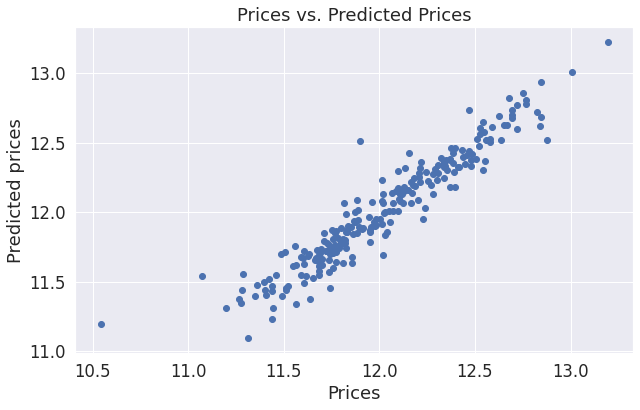

In [101]:
# Sacetter plot of Prices vs Predicted Prices
sns.set(font_scale=1.5)
plt.figure(figsize=(10,6))
plt.scatter(Y_val, Y_lr_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs. Predicted Prices")



Text(0, 0.5, 'Residuals')

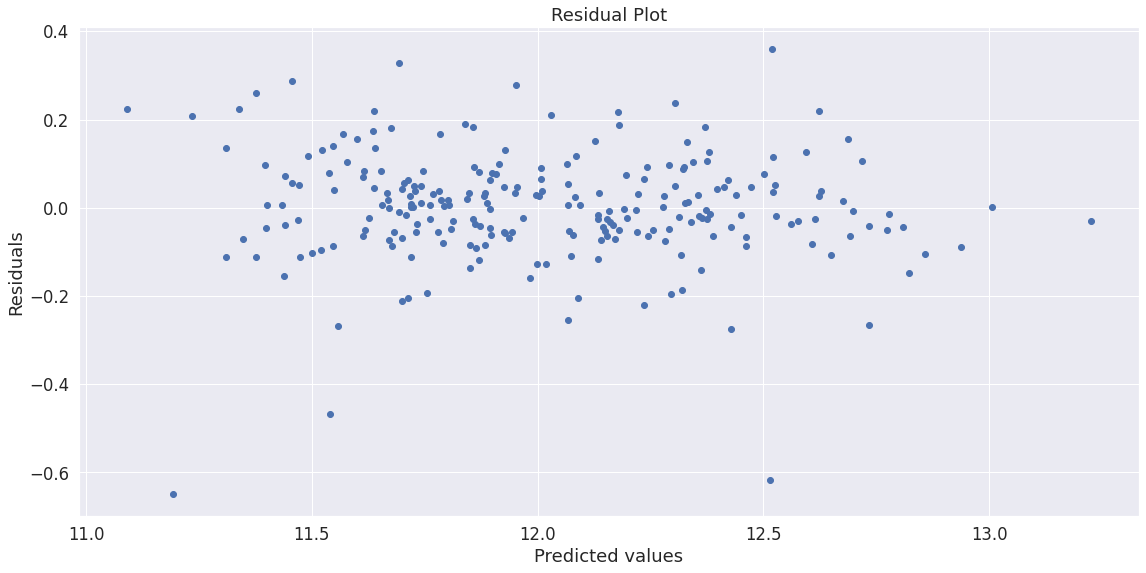

In [102]:
# residual plot of LR
plt.figure(figsize=(19,9))
plt.scatter(Y_lr_pred, Y_val-Y_lr_pred)
plt.title("Residual Plot")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")

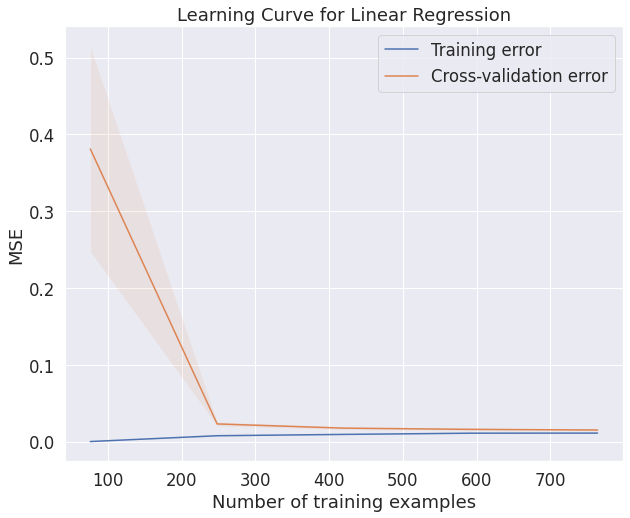

In [103]:
# Create the learning curve
train_sizes, train_scores, test_scores = learning_curve(lr_model, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the training and testing scores
train_mean = -np.mean(train_scores, axis=1)
train_std = -np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = -np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 8))
plt.plot(train_sizes, train_mean, label='Training error')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label='Cross-validation error')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Number of training examples')
plt.ylabel('MSE')
plt.title('Learning Curve for Linear Regression')
plt.legend()
plt.show()

### The model and performance plots show that the predicted values and the true values are close with RMSE of 0.124. The residual plot shows randomness around 0, and it has some values which are not highly concentrated around origin. The learning curve tells us that the model is overfitting because of its simple understanding of the data. It cannot capture the complexity.

## GradientBoostingRegressor Model

In [104]:
# instantiate model
gbr = GradientBoostingRegressor(random_state=0)
param_grid = {'n_estimators': [2500],
              'max_features': [13],
              'max_depth': [5],
              'learning_rate': [0.05],
              'subsample': [0.8],
             'random_state' : [5]}
                              


In [105]:
# train the model
gb_model = GridSearchCV(estimator=gbr, param_grid=param_grid, n_jobs=1, cv=5)
gb_model.fit(X_train, Y_train)



GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=0),
             n_jobs=1,
             param_grid={'learning_rate': [0.05], 'max_depth': [5],
                         'max_features': [13], 'n_estimators': [2500],
                         'random_state': [5], 'subsample': [0.8]})

In [106]:
# predict the validation data
Y_gb_pred = gb_model.predict(X_val)

print('Best Parameters: {}'.format(gb_model.best_params_))




Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 13, 'n_estimators': 2500, 'random_state': 5, 'subsample': 0.8}


In [107]:
print("RMSE score for GB: {:.3f}".format(rmse(gb_model)))



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.8s remaining:   16.2s


RMSE score for GB: 0.121


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.3s finished


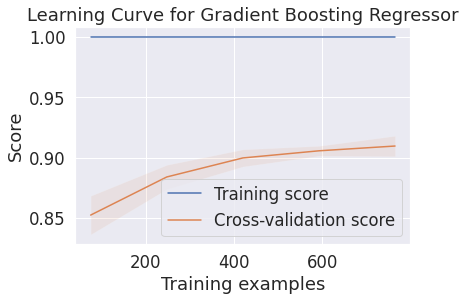

In [108]:
# Create the learning curve
train_sizes, train_scores, test_scores = learning_curve(gb_model, X_train, Y_train, cv=5)

# Calculate the mean and standard deviation of the training scores and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Create the learning curve plot
plt.plot(train_sizes, train_mean, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve for Gradient Boosting Regressor')
plt.legend()
plt.show()

#### The curve shows that the training score is higher than cross-validation score. This shows that the model might be too complex and fitting noise in training data which makes it overfitting.

Text(0, 0.5, 'Residuals')

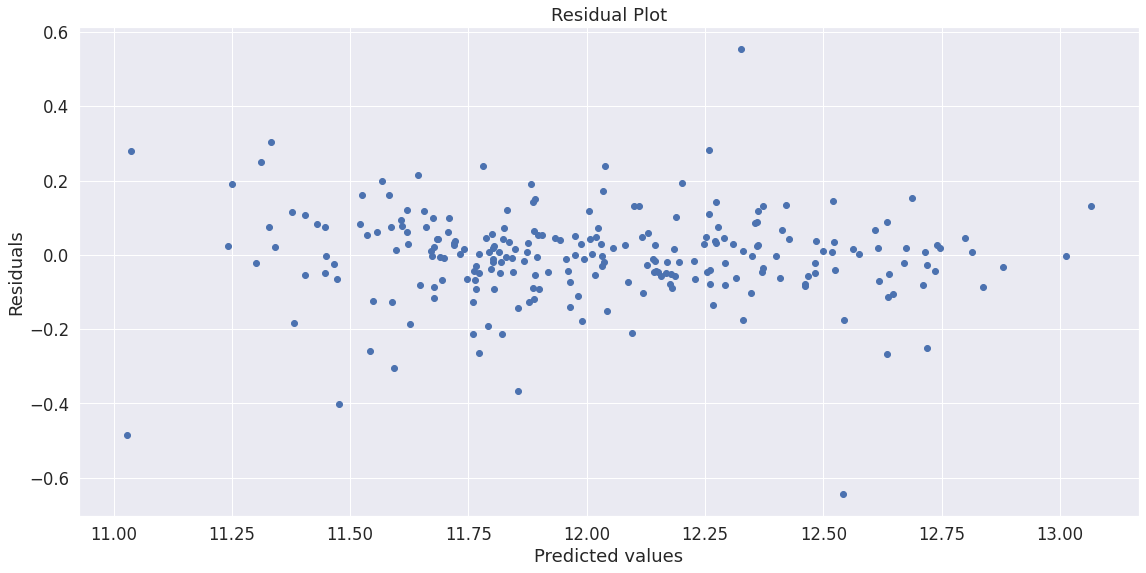

In [109]:
# residual plot of GB
plt.figure(figsize=(19,9))
plt.scatter(Y_gb_pred, Y_val-Y_gb_pred)
plt.title("Residual Plot")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")

## XGBRegressor Model

In [110]:
xgbreg = xgb.XGBRegressor(seed=0)
param_grid2 = {'n_estimators': [2000], 
              'learning_rate': [0.05],
              'max_depth': [3, 7],
              'subsample': [0.8],
              'colsample_bytree': [0.45, 0.75]}
    


In [111]:
# instantiate and train the model
xgb_model = GridSearchCV(estimator=xgbreg, param_grid=param_grid2, n_jobs=1, cv=10)
xgb_model.fit(X_train, Y_train)



GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=1,
             param_grid={'colsample_bytree': [0.45, 0.75],
                         'learning_rate': [0.05], 'max_depth': [3, 7],
                         'n_estimators': [2000], 'subsample': [0.8]})

In [112]:
# predict the validation data
Y_xgb_pred = xgb_model.predict(X_val)


In [113]:

print('\n\nBest Parameters: {}'.format(xgb_model.best_params_))
print("RMSE score for XGB: {:.3f}".format(rmse(xgb_model)))



Best Parameters: {'colsample_bytree': 0.45, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 2000, 'subsample': 0.8}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.6min remaining:  2.4min


RMSE score for XGB: 0.125


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.7min finished


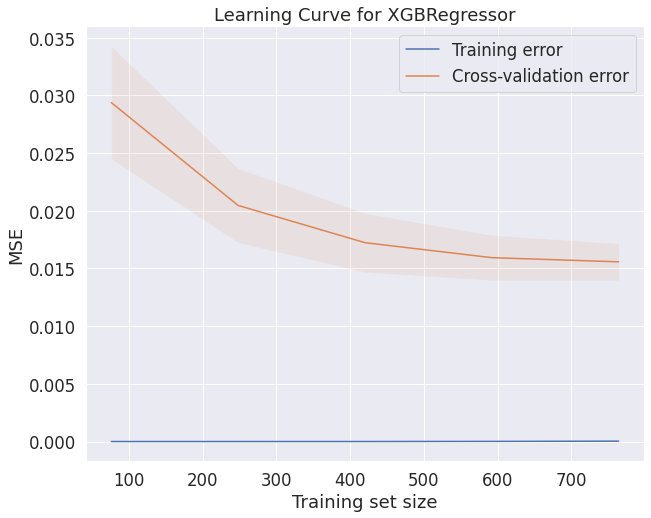

In [115]:
# Create the learning curve
train_sizes, train_scores, test_scores = learning_curve(xgb_model, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the training and testing scores
train_mean = -np.mean(train_scores, axis=1)
train_std = -np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = -np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 8))
plt.plot(train_sizes, train_mean, label='Training error')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label='Cross-validation error')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Training set size')
plt.ylabel('MSE')
plt.title('Learning Curve for XGBRegressor')
plt.legend()
plt.show()

In [116]:
# residual
residual_xgb = Y_val-Y_xgb_pred

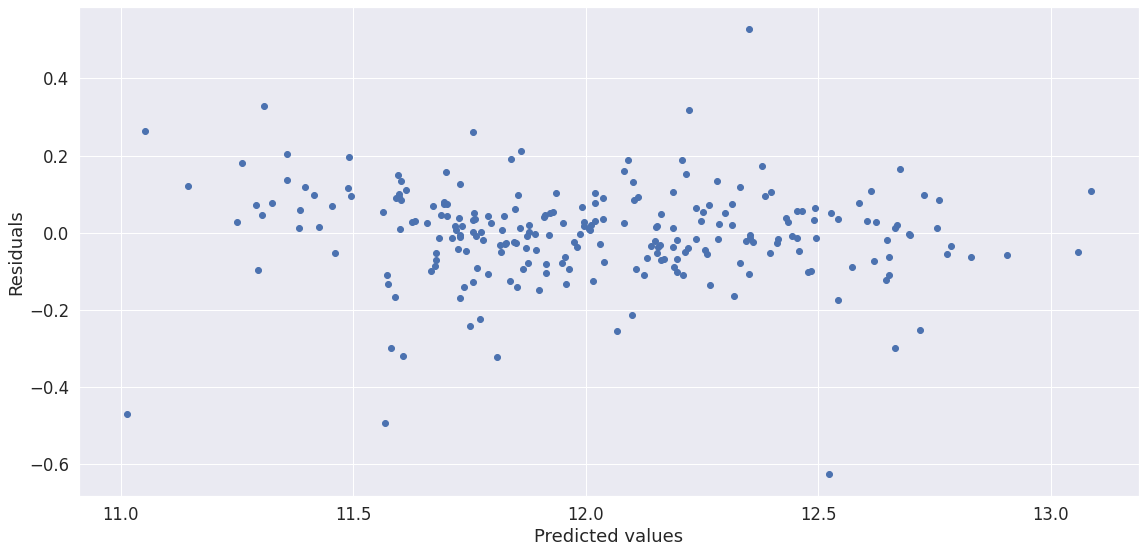

In [117]:
# residual plot for xgb
fig = plt.figure(figsize = (19,9))
plt.scatter(Y_xgb_pred,residual_xgb)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

#### The residual plot and learning curve shows that the model might be overfitting. Because the training error is lower than cross-validation error. But the difference between them is extremely low. This might show that the model might be better than gradient boostingregressor. But overall considering the RMSE value and the plots XGBRegressor model is the best model.

In [101]:
Y_pred = lr_model.predict(X_test)

In [104]:
Y_pred

array([11.68800916, 11.58711334, 12.08003248, ..., 12.04916464,
       11.66424808, 12.29448064])